# Hypothesis testing

### Example 1

US male adult population height. 

$H_0: \mu = 72$

and your alternative hypothesis is

$H_a: \mu < 72$ 
    
$1-\alpha = 95\%$

## Testing a mean of a population

You know the population is distributed normal, but you don't know the variance? 

In this case is the __student's t test__. The __t-distribution__ has parameter, $\nu$:

$\nu = n - 1$ 

Our test statistics is based on the mean of the sample, $\hat X$ computed as:

$\hat X = \frac{1}{n} \sum_{i=1}^{n} X_i$ 

Sample variance:

$S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i-\mu)^2$

So then, the __t-score or t-test statistics t__:

$\hat t = \frac{\hat X - \mu}{\frac{S}{\sqrt n}}$

And then:

$t \sim t(n-1)$

All the rest studied for a normal distribution applies in this case. 



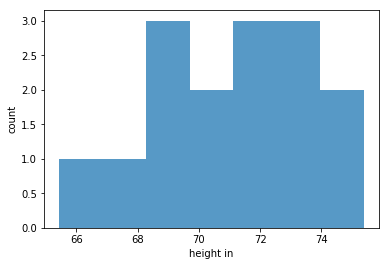

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
mu_real = 71
s_real = 2.8
n_samples = 15
values= np.random.normal(mu_real,s_real,n_samples)
n, bins, patches = plt.hist(values,7, alpha=0.75)
plt.xlabel('height in')
plt.ylabel('count')
plt.show()

In [2]:
x_bar = np.mean(values)
S = np.sqrt(np.var(values,ddof=1)) #ddof is delta degrees of freedom. It is the numerator n-ddof, which in our case is 1
t_stat = np.sqrt(n_samples)*(x_bar-72)/S

print("Sample mean: ",np.round(x_bar,3))
print("Sample standard deviation: ",np.round(S,3) )
print("t-statistics: ",np.round(t_stat,3) )

Sample mean:  70.957
Sample standard deviation:  2.771
t-statistics:  -1.458


$\hat t = \frac{\hat X - \mu}{\frac{S}{\sqrt n}} = \frac{70.957 - 72}{\frac{2.771}{\sqrt{15}}} = -1.458$

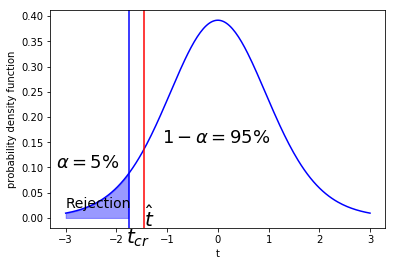

In [3]:
from scipy.stats import t
df = n_samples-1

x = np.linspace(-3,3, 200)
w1 = t.ppf(0.05,df)
x1 = np.linspace(-3,w1, 200)
w2 = t.ppf(0.95,df)
x2 = np.linspace(w2,3, 200)
fig, ax = plt.subplots(1, 1)

y = t.pdf(x,df)
y1 = t.pdf(x1,df)

ax.plot(x, y, 'b-')
plt.fill_between(x1,y1, color = 'b',alpha=0.4)

plt.xlabel('t')
plt.ylabel('probability density function')

plt.text(-1.1, 0.15, r'$1-\alpha = 95\%$', fontsize=18)
plt.text(-3.2, 0.1, r'$\alpha = 5\%$', fontsize=18)
#plt.text(2.1, 0.1, r'$\alpha/2 = 5\%$', fontsize=18)
plt.text(-3, 0.02, r'Rejection', fontsize=14)
t_crit =  np.round(t.ppf(0.05,df),3)
plt.text(t_crit-0.05, -0.05, r'$t_{cr}$', fontsize=20)
plt.text(t_stat, -0.015, r'$\hat t$', fontsize=20)


plt.axvline(x=t_stat, color='r')
plt.axvline(x=t_crit, color='b')

plt.show()

In [4]:
t_crit =  np.round(t.ppf(0.05,df),3)
print("The critical t-statistics is: ", t_crit)

The critical t-statistics is:  -1.761


How to define the p-value? It's the probability of a type I error given your data. In this case:

$ p = P(t< \hat t) = P(t\leq -1.458 ) = 0.0834$

In [5]:
print("p: ",np.round(t.cdf(t_stat,df)*100,2),"%")

p:  8.34 %


You cannot reject the null hypothesis: two options
* You lower your level of confidence, increasing $\alpha$ to at least your p-value
* You do more experiments

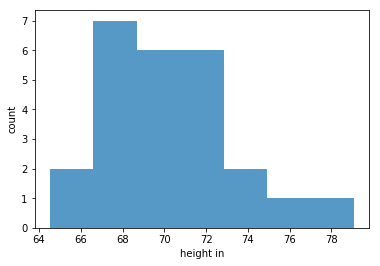

In [9]:
n_samples = 25
values= np.random.normal(mu_real,s_real,n_samples)

n_samples = n_samples
n, bins, patches = plt.hist(values,7, alpha=0.75)
plt.xlabel('height in')
plt.ylabel('count')
plt.show()

In [10]:
x_bar = np.mean(values)
S = np.sqrt(np.var(values,ddof=1)) #ddof is delta degrees of freedom. It is the numerator n-ddof, which in our case is 1
t_stat = np.sqrt(n_samples)*(x_bar-72)/S

print("Sample mean: ",np.round(x_bar,3))
print("Sample standard deviation: ",np.round(S,3) )
print("t-statistics: ",np.round(t_stat,3) )

Sample mean:  70.034
Sample standard deviation:  3.191
t-statistics:  -3.081


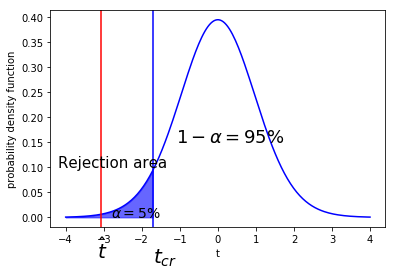

In [11]:
df = n_samples-1

x = np.linspace(-4,4, 200)
w1 = t.ppf(0.05,df)
x1 = np.linspace(-4,w1, 200)
w2 = t.ppf(0.95,df)
x2 = np.linspace(w2,4, 200)
fig, ax = plt.subplots(1, 1)

y = t.pdf(x,df)
y1 = t.pdf(x1,df)
#y2 = t.pdf(x2,df)

ax.plot(x, y, 'b-')
plt.fill_between(x1,y1, color = 'b',alpha=0.6)
#plt.fill_between(x2,y2, color = 'b')

plt.xlabel('t')
plt.ylabel('probability density function')

plt.text(-1.1, 0.15, r'$1-\alpha = 95\%$', fontsize=18)
plt.text(-2.8, 0.0, r'$\alpha = 5\%$', fontsize=14)
#plt.text(2.1, 0.1, r'$\alpha/2 = 5\%$', fontsize=18)
plt.text(-4.2, 0.1, r'Rejection area', fontsize=15)
t_crit =  np.round(t.ppf(0.05,df),3)
plt.text(t_crit, -0.09, r'$t_{cr}$', fontsize=20)
plt.text(t_stat-0.1, -0.08, r'$\hat t$', fontsize=20)


plt.axvline(x=t_stat, color='r')
plt.axvline(x=t_crit, color='b')

plt.show()

In [12]:
print("p: ",np.round(t.cdf(t_stat,df)*100,2),"%")

p:  0.26 %


In [ ]:
#from ipywidgets import *
#import numpy as np
#import matplotlib.pyplot as plt
# %matplotlib inline
# from scipy.stats import norm
# from scipy.stats import t

# x = np.linspace(-5,5,100)
# p_0 = 0
# s_0 = 1

# def update(n = (1,40,2)):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.fill_between(x, t.pdf(x,n))
#     ax.plot(x, norm.pdf(x),color='k')
#     plt.xlim(-5,5)
#     plt.ylim(0,0.42)
#     plt.xlabel('x')
#     plt.ylabel('probability density')

#     fig.canvas.draw()
# interact(update);

![TvsN.gif](https://raw.githubusercontent.com/antonfadic/DSproject/master/TvsN.gif)

## Setting the level of confidence. Precision and recall

* The level of confidence affects the decision of rejecting or non-rejecting the null hypothesis
* Rejecting the null hypothesis, when it is true, is called __type I error__. This is a __false positive, or false alarm__
* Non-rejecting the null hypothesis, when it is false, is called __type II error__ . This is a __miss or fail__

__Type I errors and Type II errors can have very different consequences!__ Two examples:

* Illness detection: prefer false positives. You don't want to be a false negative!
* Spam detection: prefer against false positives. You don't want to miss important emails!

__Precision__ 

$pr = \frac{tp}{tp+fp}$ 


__Recall__ 

$re = \frac{tp}{tp+fn}$

One way to combine both measures of effectivness of the test is called the __F$_1$ score__, computed as:

$F_1 = \frac{2}{\frac{1}{pr} + \frac{1}{re}}$ 

Another way to combine both of them:

$F_{\beta} = (1+\beta^2) \frac{1}{\frac{\beta^2}{re} + \frac{1}{pr}}$

### Summary

When doing hypothesis testing, check the following.

* Do you know the distribution of your data? Is it normal? Do you know the population variance?
* If you don't know the variance, but you know that the data comes from a normal, you can use the student t distribution with n-1 degrees of freedom. You can approximate the population variance by the sample variance.
* To do hypothesis testing you need: A null hypothesis $H_0$, and alternative hypothesis $H_a$, a level of confidence $1-\alpha$, data, and a test statistics $\hat p$. 
* Be aware of type I and type II errors, and how they relate to the level of confidence.